In [1]:
import numpy as np
from scipy import stats
import itertools
import math
import matplotlib.pyplot as plt


In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

In [3]:
samples = [rng() for _ in range(1000)]
samples

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569,
 0.04194940160959959,
 0.1948235605377704,
 0.1386128985323012,
 0.6840353596489877,
 0.49171859584748745,
 0.7676989699248224,
 0.8828409514389932,
 0.8232365751173347,
 0.8835694054141641,
 0.8901184604037553,
 0.9114757110364735,
 0.5759661465417594,
 0.3127383701503277,
 0.15734241367317736,
 0.1734505402855575,
 0.45860223821364343,
 0.2598799681290984,
 0.7005771037656814,
 0.3033791915513575,
 0.8927010844927281,
 0.9657614398747683,
 0.9349605368915945,
 0.9332623495720327,
 0.337260173400864,
 0.8791998000815511,
 0.7909467287827283,
 0.1946238619275391,
 0.6778173677157611,
 0.6001160368323326,
 0.41346341953612864,
 0.7079516570083797,
 0.23176096356473863,
 0.4895814983174205,
 0.06321822595782578,
 0.10631834948435426,
 0.4792256865184754,
 0.8687314670532942,
 0.7

Задача 1


Реализовать serial test и применить к выборке samples

In [13]:
m = 4
n = 5
f_obs = np.histogram2d(samples[::2], samples[1::2], bins=[m, n])
f_exp = np.full(m*n, len(samples)//(2*m*n))

print(f_obs[0]) 
print(f_exp) 
print(stats.chisquare(f_obs[0].flatten(), f_exp))
    

[[33. 20. 28. 24. 18.]
 [24. 22. 25. 25. 24.]
 [22. 14. 29. 21. 24.]
 [26. 32. 31. 25. 33.]]
[25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]
Power_divergenceResult(statistic=18.88, pvalue=0.46455828629928364)


Задача 2

Реализовать permutation test и применить к выборке samples

In [17]:
d = 2
f_obs=np.zeros(math.factorial(d))
for j in range(0, len(samples) - d + 1, d):
    n = 0
    for i in itertools.permutations(sorted(samples[j:j + d])):
        if samples[j:j+d] == list(i):
            f_obs[n]+=1
            break
        n += 1
f_exp=np.full(math.factorial(d), len(samples)//(math.factorial(d)*d))
print(f_obs)
print(f_exp)
print(stats.chisquare(f_obs, f_exp))

[248. 252.]
[250 250]
Power_divergenceResult(statistic=0.032, pvalue=0.8580276569875211)


In [15]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

Задача 3

Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [23]:
k = 10000

random = [rng_bad() for _ in range(300000)]
f_obs = np.histogram(random, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(random) // k)

print(stats.chisquare(f_obs, f_exp))

samples = [rng() for _ in range(300000)]
f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(samples) // k)

print(stats.chisquare(f_obs, f_exp))

Power_divergenceResult(statistic=10101.466666666667, pvalue=0.23366356490732001)
Power_divergenceResult(statistic=10167.533333333333, pvalue=0.11705321979513532)


Задача 4


Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

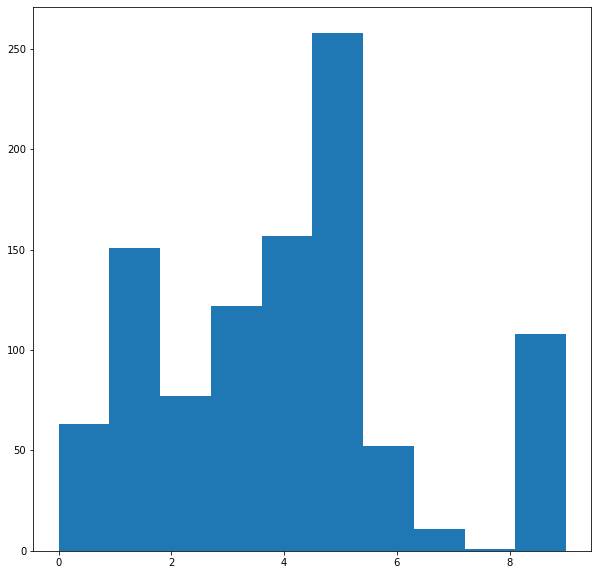

In [28]:
prob=[0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]

def discr(p, n):
    p1 = []
    p=np.array(p)/sum(p)
    for i in range(len(p)+1):
        p1.append(sum(p[:i]))
        
    r = np.random.rand(n)
    distr=[]
    for i in r:
        for j in range(len(p1) - 1):
            if i >= p1[j] and i < p1[j+1]:
                distr.append(j)
                break
    return distr


arr = discr(prob, 1000)
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:white')
ax.hist(arr, 10)
plt.show()

Задача 5

Смоделируйте выборку размера 1000 из распределения Exp(λ) с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

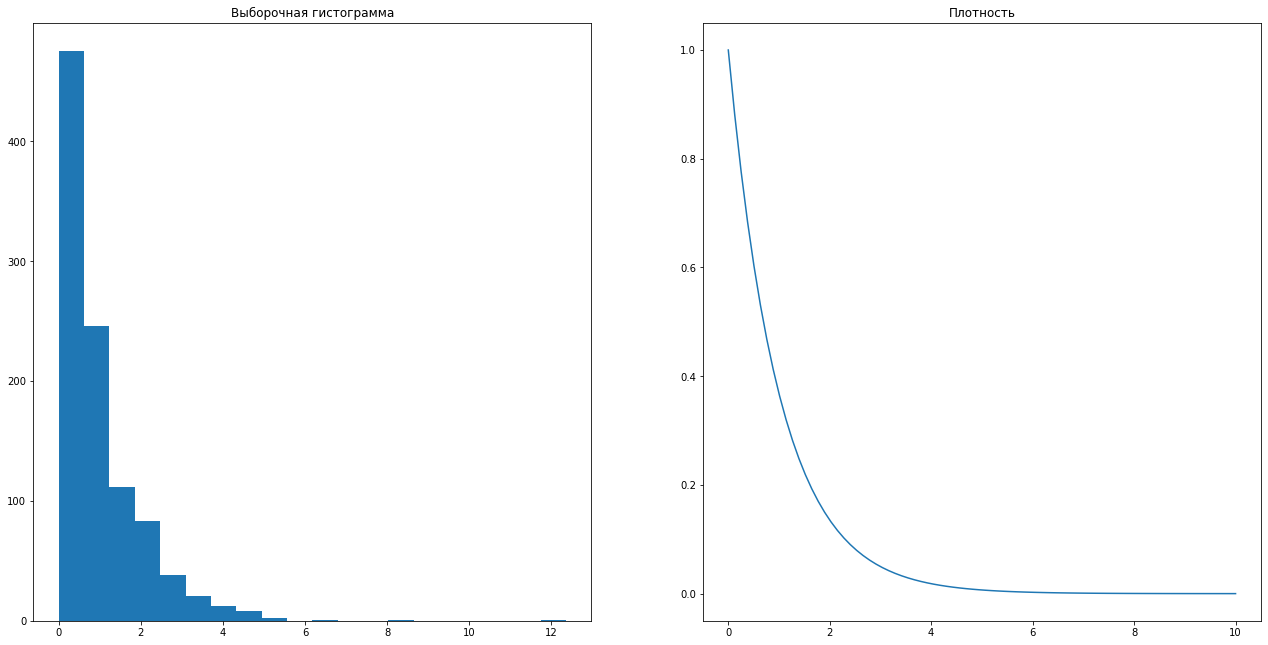

In [35]:
def exp(a, n):
    r = np.random.rand(n)
    return (-1 / a) * np.log(1 - r)

arr = exp(1, 1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11))
ax1.set_title("Выборочная гистограмма")
ax2.set_title("Плотность")
X = np.linspace(0, 10, 80, endpoint=True)
ax1.hist(arr, 20)
C = np.exp(-X)
ax2.plot(X, C)

plt.show()

Задача 6

Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью excos2x на отрезке [−π/2,π/2]. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

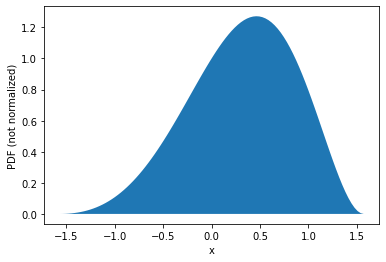

In [36]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

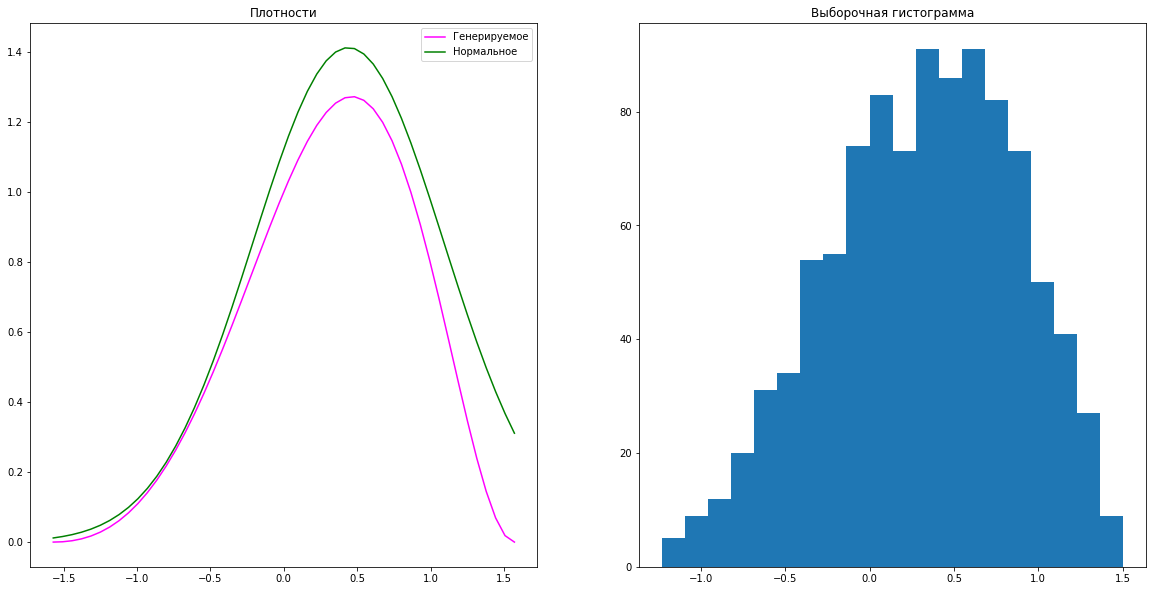

In [62]:
m= 0.44
v= 0.65

X = np.linspace(-np.pi/2, np.pi/2, 50, endpoint=True)
Y = np.exp(X)*np.cos(X)**2
def dens(x):
    return 2.3*(1/((2*np.pi*(v**2))**0.5))*math.exp(-((x-m)**2)/(2*(v**2)))
Y1 = np.vectorize(dens)(X)


i=0
sample=[]
while i<1000:
    s = np.random.normal(m, v)
    if s>= -np.pi/2 and s <= np.pi/2:
        if np.random.rand()*dens(s)<=math.exp(s)*(np.cos(s)**2):
            sample.append(s)
            i+=1
            
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(X, Y, label="Генерируемое", c="magenta")
ax1.set_title("Плотности")
ax1.plot(X, Y1, label="Нормальное", c="green")
ax1.legend()
ax2.hist(sample, 20)
ax2.set_title('Выборочная гистограмма')

plt.show()


Задача 7

Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

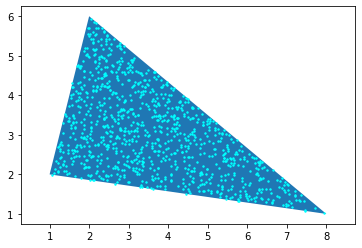

In [76]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)

sample = np.random.rand(2000).reshape((-1,2))
for i in range(1000):
    if sample[i][0] + sample[i][1] > 1:
        sample[i][0] = 1 - sample[i][0]
        sample[i][1] = 1 - sample[i][1]
     
a=np.array([1, 2])
b=np.array([1, 4])
c=np.array([7, -1])

points=[]
for i in range(1000):
    points.append(a+sample[i][0] * c + sample[i][1] * b)
points=np.array(points)

plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(points[:,0], points[:,1], s=2 ,c='cyan')
plt.axis('equal')
plt.show()



Задача 8

Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

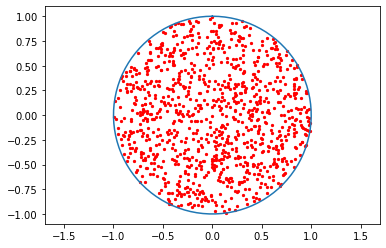

In [91]:
points = generate_circle(1000)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

def generate_circle(n):
    p=[]
    for i in range(n):
        alpha = np.random.rand() * 2 * math.pi
        r = math.sqrt(np.random.rand())
        p.append(r * math.cos(alpha)) 
        p.append(r * math.sin(alpha))
    return p  

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(points[::2], points[1::2], s=5, c="r")
plt.show()

Задача 9

Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

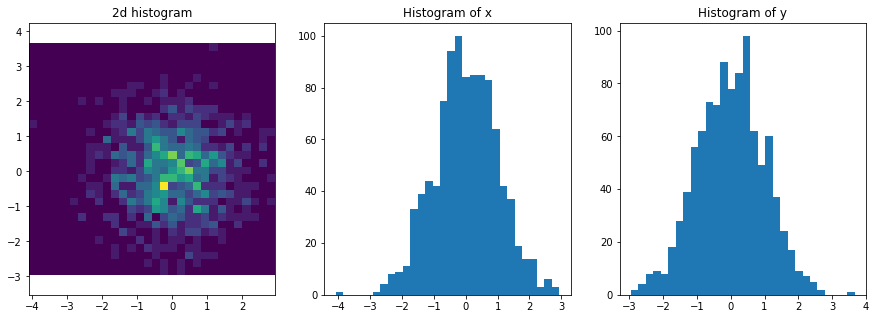

In [93]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

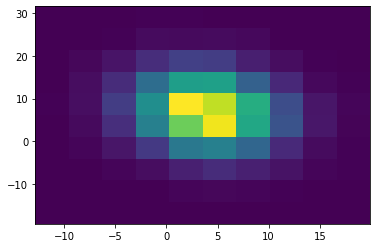

Выборочное среднее [4.01129588 6.95412986]
Выборочная ковариационная матрица [[20.25690694 -3.94647415]
 [-3.94647415 39.99661635]]


In [110]:
n_ = 10000
def box_muller(n):
    p=[]
    i=0
    while i < n:
        x = np.random.rand() * 2 - 1
        y = np.random.rand() * 2 - 1
        r = x**2 + y**2
        if r > 0 and r <= 1:
            p.append(x * math.sqrt(-2 * math.log(r) / r))
            p.append(y * math.sqrt(-2 * math.log(r) / r))
            i += 1
    return p

sample = np.array(box_muller(n_)).reshape((-1,2))
a = np.array([20, -4, -4, 40]).reshape((2, 2))
b = np.linalg.cholesky(a)
sample2 = np.transpose(np.dot(b, np.transpose(sample)))+np.full((n_, 2), [4, 7])
fig = plt.figure()

plt.hist2d(sample2[:,0], sample2[:,1])
plt.show()
print("Выборочное среднее", np.mean(sample2, axis=0))
print("Выборочная ковариационная матрица", np.cov(sample2, rowvar=False))